# 5.2 Chemical Reactions

## a
**Solve and plot the solution to the ODEs with $c_{CO_2} (0) = 1$ and  $c_{H_2CO_3} (0) = 0$ for $t \in [0, 20]$ using any method you wish and plot $c_{H_2CO_3} (t)$.**

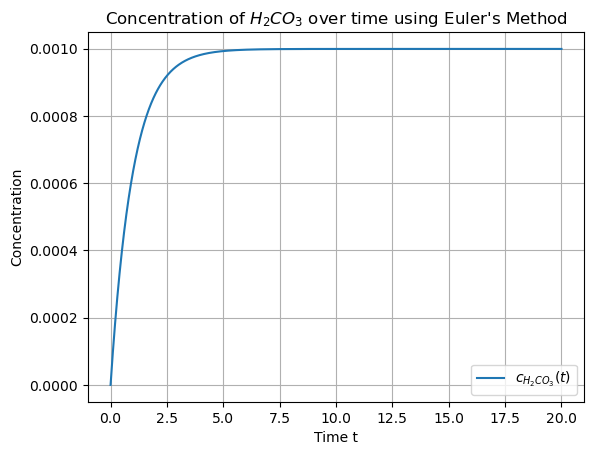

In [12]:
import numpy as np
import matplotlib.pyplot as plt

k1 = 1e-3
k2 = 1.0
N = 1000
t_max = 20
t = np.linspace(0, t_max, N)
dt = t[1] - t[0]

c_CO2 = np.zeros(N)
c_H2CO3 = np.zeros(N)
# initial
c_CO2[0] = 1.0
c_H2CO3[0] = 0.0

# ODEs
def f_CO2(c_CO2, c_H2CO3):
    return -k1 * c_CO2 + k2 * c_H2CO3
def f_H2CO3(c_CO2, c_H2CO3):
    return k1 * c_CO2 - k2 * c_H2CO3


# Euler's method to solve the ODEs
for i in range(1, N):
    c_CO2[i] = c_CO2[i-1] + dt * f_CO2(c_CO2[i-1], c_H2CO3[i-1])
    c_H2CO3[i] = c_H2CO3[i-1] + dt * f_H2CO3(c_CO2[i-1], c_H2CO3[i-1])

plt.plot(t, c_H2CO3, label=r'$c_{H_2CO_3}(t)$')
plt.xlabel('Time t')
plt.ylabel('Concentration')
plt.title('Concentration of $H_2CO_3$ over time using Euler\'s Method')
plt.legend()
plt.grid(True)
plt.show()


## b
**Simulate the system five times using the Gillespie algorithm
and plot $N_{H_2CO_3} (𝑡)/10000$ in the same plot as $c_{H_2CO_3}(𝑡)$.
Use `plt.step(..., where=’post’)` to make the plot.**

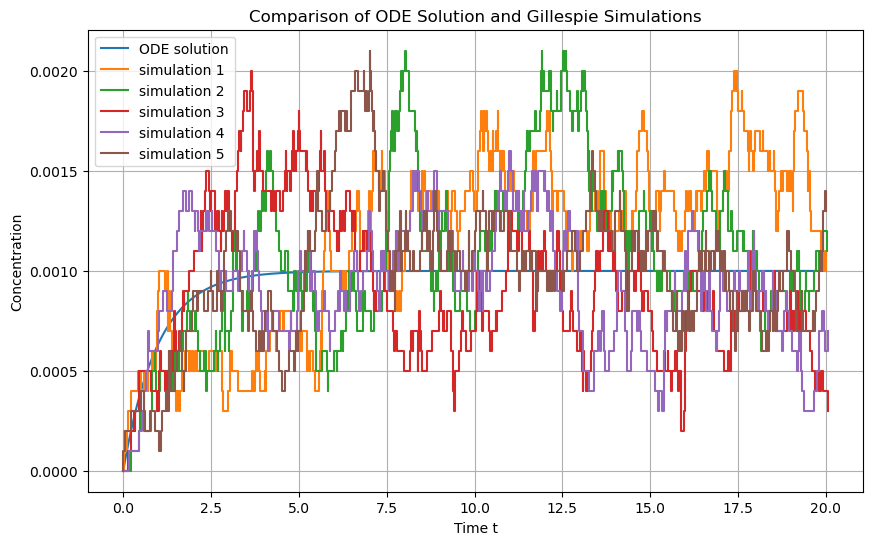

In [13]:
import numpy as np
import matplotlib.pyplot as plt

k1 = 1e-3
k2 = 1.0
N_CO2 = 10000
num_simulations = 5

def gillespie(N_CO2_init, k1, k2, t_max):
    t = 0
    times = [t]
    
    N_CO2 = N_CO2_init
    N_H2CO3 = 0
    N_H2CO3_vals = [N_H2CO3]

    while t < t_max:
        # 1. Calculate current rates using the current x(t)    
        R_forward = k1 * N_CO2 # rate of CO2 -> H2CO3
        R_backward = k2 * N_H2CO3 # rate of H2CO3 -> CO2

        # 2. Calculate the total rate R 
        R = R_forward + R_backward

        # return if no more reactions can occur
        if R == 0:
            break
        
        # 3. Sample dt from an exponential distribution with parameter R.
        dt = np.random.exponential(1 / R)

        # 4. Sample a uniform number 𝑈 between 0 and 𝑅.
        U = np.random.uniform(0, R)

        #5. Find the first event 𝑗 such that the sum of the rates up to j is greater than or equal U.
        # 6. Let t += dt and update x(t) according to event j.
        t += dt
        if U <= R_forward:
            N_CO2 -= 1
            N_H2CO3 += 1
        else:
            N_CO2 += 1
            N_H2CO3 -= 1

        times += [t]
        N_H2CO3_vals+= [N_H2CO3]

    return np.array(times), np.array(N_H2CO3_vals) / N_CO2_init

plt.figure(figsize=(10, 6))
plt.plot(t, c_H2CO3, label='ODE solution')

for i in range(num_simulations):
    t_sim, N_H2CO3_sim = gillespie(N_CO2, k1, k2, t_max)
    plt.step(t_sim, N_H2CO3_sim, where='post', label = f"simulation {i+1}")

plt.xlabel('Time t')
plt.ylabel('Concentration')
plt.title('Comparison of ODE Solution and Gillespie Simulations')
plt.legend()
plt.grid(True)
plt.show()


## c 
**Make the same the plots for $N = 1000$, $N = 10000$, $N = 100000$,
and $N = 1000000$.**

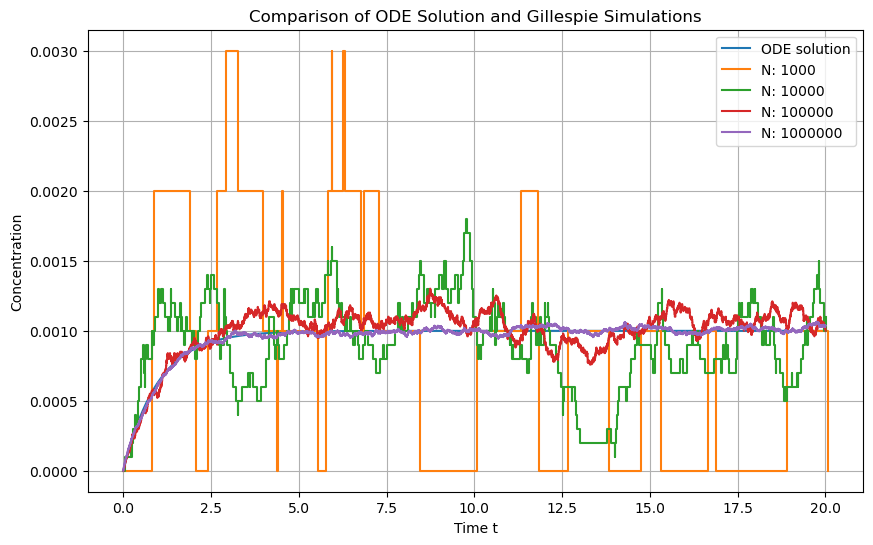

In [14]:
N_values = [1000, 10000, 100000, 1000000]

plt.figure(figsize=(10, 6))
plt.plot(t, c_H2CO3, label='ODE solution')

for N in N_values:
    t_sim, N_H2CO3_sim = gillespie(N, k1, k2, t_max)
    plt.step(t_sim, N_H2CO3_sim, where='post', label = f"N: {N}")

plt.xlabel('Time t')
plt.ylabel('Concentration')
plt.title('Comparison of ODE Solution and Gillespie Simulations')
plt.legend()
plt.grid(True)
plt.show()


# 5.3 Local Voter model

## a
**Explain what the rates mean. Why are the ‘convincing‘ rates proportional to $D \cdot R$?**

## b
**Initialize a system with $R = 25$ and $D = 25$ and simulate the above rate system using the Gillespie method for 500,000 steps.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 50  # residents
R_init = 25  # Initial number of Republicans
D_init = 25  # Initial number of Democrats
t_max = 500000  

# Rate at which a party member randomly switches parties
random_switch = 0.1  

# Rate at which a party member convinces another party member 
# to switch parties (e.g. Democrats convincing Republicans)
convince_switch = 0.01  

def gillespie_voter(R_init, D_init, t_max):
    t = 0
    times = [t]
    
    R = R_init
    D = D_init
    R_vals = [R]
    D_vals = [D]
    
    while t < t_max and R + D > 0:
        R_to_D = random_switch * R  # Republican randomly become Democrat
        D_to_R = random_switch * D  # Democrat randomly become Republican
        Convince_D_to_R = convince_switch * D * R  # Republican convince Democrat
        Convince_R_to_D = convince_switch * R * D  # Democrat convince Republican

        total_rate = R_to_D + D_to_R + Convince_D_to_R + Convince_R_to_D
        
        if total_rate == 0:
            break
        
        dt = np.random.exponential(1 / total_rate)
        t += dt
        
        U = np.random.uniform(0, total_rate)
        
        if U <= R_to_D: # Republicans randomly become Democrats
            R -= 1
            D += 1
        elif U <= R_to_D + D_to_R: # Democrats randomly become Republicans
            D -= 1
            R += 1
        elif U <= R_to_D + D_to_R + Convince_D_to_R: # Republicans convince Democrats
            D -= 1
            R += 1
        else: # Democrats convince Republicans
            R -= 1
            D += 1
        times += [t]
        R_vals += [R]
        D_vals += [D]
    
    return np.array(times), np.array(R_vals), np.array(D_vals)

times, R_vals, D_vals = gillespie_voter(R_init, D_init, t_max)

## c
**Plot $R$ and $D$ as a function of time and discuss the result.**

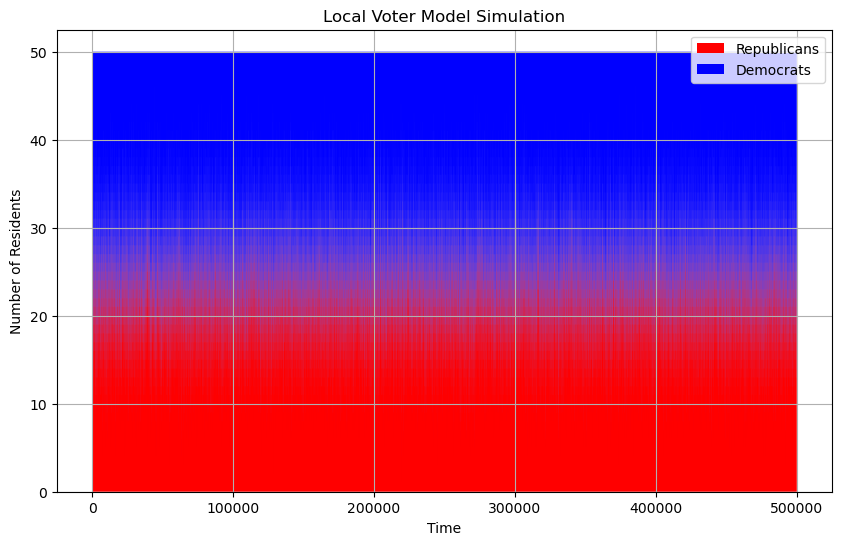

In [2]:
plt.figure(figsize=(10, 6))
plt.stackplot(times, R_vals, D_vals, labels=['Republicans', 'Democrats'], colors = ['red', 'blue'])
plt.xlabel('Time')
plt.ylabel('Number of Residents')
plt.title('Local Voter Model Simulation')
plt.legend(loc="best")
plt.grid(True)
plt.show()

## d
**Initialize a system with $R = 0$, $U = 50$ and $D = 0$ and simulate the
above rate system using the Gillespie method for 500,000 steps**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 50  # Total number of residents
R_init = 0  # Initial number of Republicans
D_init = 0  # Initial number of Democrats
U_init = 50  # Initial number of Undecided
t_max = 500000  

random_switch_to_undecided = 0.1  # affiliated randomly becomes undecided
random_switch_from_undecided = 0.05  # undecided randomly becomes affiliated
convince_switch = 0.01  # convinces another to switch 

def gillespie_voter_undecided(R_init, D_init, U_init, t_max):
    t = 0
    times = [t]
    
    R = R_init
    D = D_init
    U = U_init
    R_vals = [R]
    D_vals = [D]
    U_vals = [U]
    
    while t < t_max and R + D + U > 0:
        # X randomly becomes Y
        D_to_U = random_switch_to_undecided * D  
        R_to_U = random_switch_to_undecided * R  
        U_to_D = random_switch_from_undecided * U  
        U_to_R = random_switch_from_undecided * U  
        
        # Republicans convince Democrats to become undecided
        Convince_D_to_U = convince_switch * D * R 

        # Democrat convince Republican to become undecided
        Convince_R_to_U = convince_switch * R * D 

        # Democrat convince undecided to become Democrat
        Convince_U_to_D = convince_switch * U * D 

        # Republican convince undecided to become Republican
        Convince_U_to_R = convince_switch * U * R 

        total_rate = (D_to_U + R_to_U + U_to_D + U_to_R + 
                      Convince_D_to_U + Convince_R_to_U + 
                      Convince_U_to_D + Convince_U_to_R)
        
        if total_rate == 0:
            break
        
        dt = np.random.exponential(1 / total_rate)
        t += dt
        
        U_random = np.random.uniform(0, total_rate)

        # Democrats randomly become undecided
        if U_random <= D_to_U:  
            D -= 1
            U += 1
        # Republicans randomly become undecided
        elif U_random <= D_to_U + R_to_U:  
            R -= 1
            U += 1
        # Undecided randomly become Democrats
        elif U_random <= D_to_U + R_to_U + U_to_D:  
            U -= 1
            D += 1
        # Undecided randomly become Republicans
        elif U_random <= D_to_U + R_to_U + U_to_D + U_to_R:  
            U -= 1
            R += 1
        # Republicans convince Democrats to become undecided
        elif U_random <= D_to_U + R_to_U + U_to_D + U_to_R + Convince_D_to_U: 
            D -= 1
            U += 1
        # Democrats convince Republicans to become undecided
        elif U_random <= (D_to_U + R_to_U + U_to_D + U_to_R + 
                          Convince_D_to_U + Convince_R_to_U):  
            R -= 1
            U += 1
        # Democrats convince undecided to become Democrats
        elif U_random <= (D_to_U + R_to_U + U_to_D + U_to_R + 
                          Convince_D_to_U + Convince_R_to_U + Convince_U_to_D):  
            U -= 1
            D += 1
        # Republicans convince undecided to become Republicans
        else:  
            U -= 1
            R += 1
        times += [t]
        R_vals += [R]
        D_vals += [D]
        U_vals += [U]
    return np.array(times), np.array(R_vals), np.array(D_vals), np.array(U_vals)

times, R_vals, D_vals, U_vals = gillespie_voter_undecided(R_init, D_init, U_init, t_max)

## e
**Plot $R$ and $D$ as a function of time and discuss the result.**

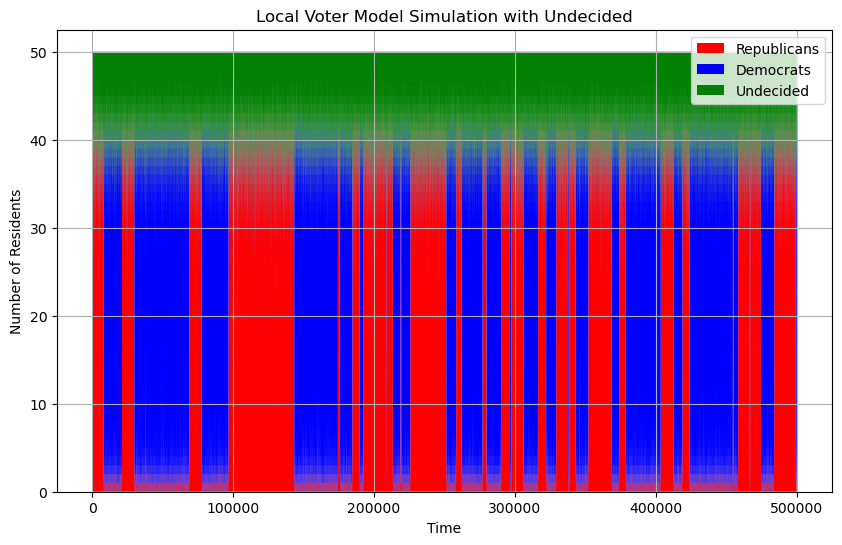

In [4]:
plt.figure(figsize=(10, 6))
plt.stackplot(times, R_vals, D_vals, U_vals, labels=['Republicans', 'Democrats', 'Undecided'],colors= ['red', 'blue', 'green'])
plt.xlabel('Time')
plt.ylabel('Number of Residents')
plt.title('Local Voter Model Simulation with Undecided')
plt.legend(loc="best")
plt.grid(True)
plt.show()

# 5.5 Ising Model

## a
**Make a function that takes an $N \times N$ matrix $S$ and calculates $H$ assuming a periodic system.**

In [1]:
import numpy as np
from numba import njit

@njit
def calculate_hamiltonian(S):
    N = S.shape[0]
    H = 0
    for i in range(N):
        for j in range(N):
            neighbor_sum = (S[(i-1) % N, j] + S[(i+1) % N, j] + # up, down
                            S[i, (j-1) % N] + S[i, (j+1) % N]) # left, right
            H -= S[i, j] * neighbor_sum                             
    return H/2 # divide by 2 to avoid duplicates 

N = 4
S = np.random.choice([-1, 1], size=(N, N))
H = calculate_hamiltonian(S)
print(f"Hamiltonian H = {H}")


Hamiltonian H = 16


## b 
**Make a function that calculates the change in energy $\Delta E$ from a spin flip at a given location $i$.**

In [2]:
from numba import njit

@njit
def delta_energy(S, i, j):
    N = S.shape[0]
    neighbor_sum = (S[(i-1) % N, j] + S[(i+1) % N, j] + # up, down
                    S[i, (j-1) % N] + S[i, (j+1) % N]) # left, right
    return 2 * S[i, j] * neighbor_sum

# Example of using the function
i, j = 1, 1
delta_E = delta_energy(S, i, j)
print(f"Delta E = {delta_E}")


Delta E = -8


## c
**Make a function that randomly accepts or rejects a spin flip based
on $\Delta E$ with probability $\alpha = min(1, e^{−\Delta E/𝑇} )$.**

In [3]:
from numba import njit

@njit
def metropolis(S, T):
    N = S.shape[0]
    i = np.random.randint(0, N)
    j = np.random.randint(0, N)
    delta_E = delta_energy(S, i, j)
    if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):  # probability: min(1, exp(-delta_E / T))
        S[i, j] *= -1  # Fliping spin


## d
**Start with a random initialisation of $S$ with $N \leq 5$ depending on the speed of your code ($N = 1000$ should be possible with numba). Let the system run for $1000 N^2$ time steps to equilibrate the system. Plot the spin configuration `(plt.imshow with interpolation=’nearest’)` at
different times during the simulation. Use $T = 0.5$. Comment on the result.**

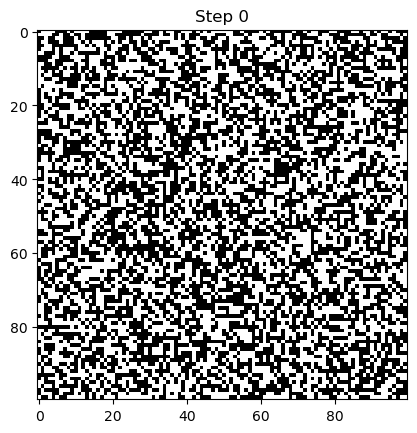

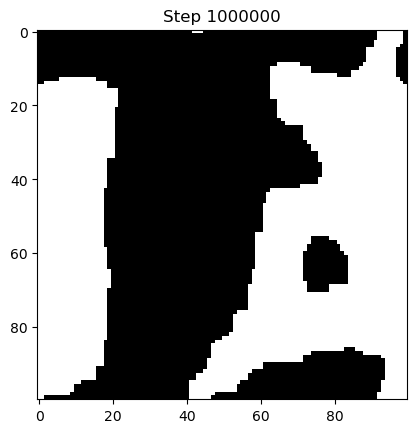

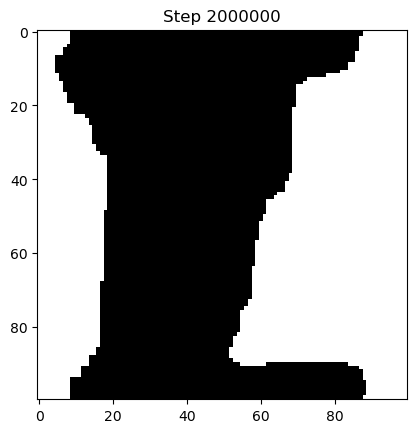

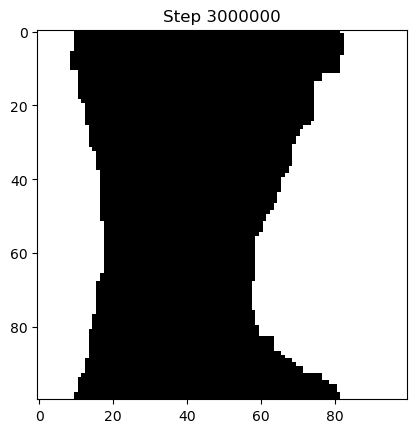

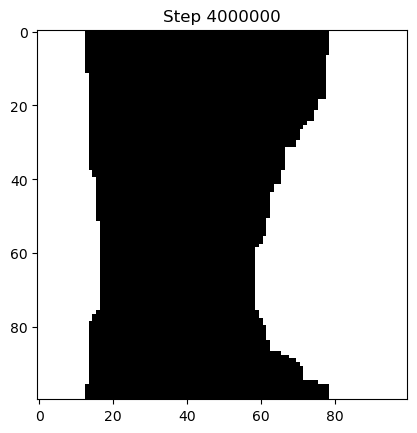

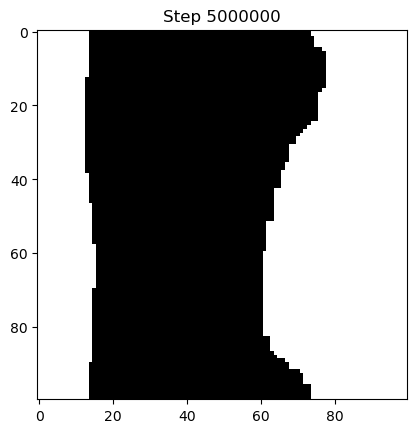

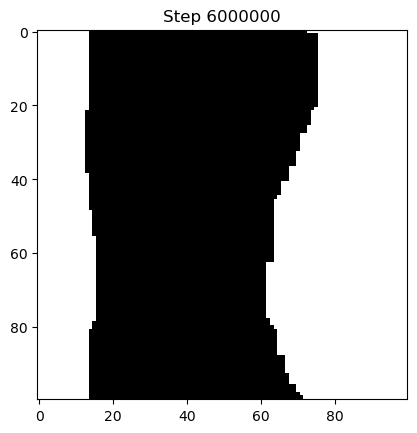

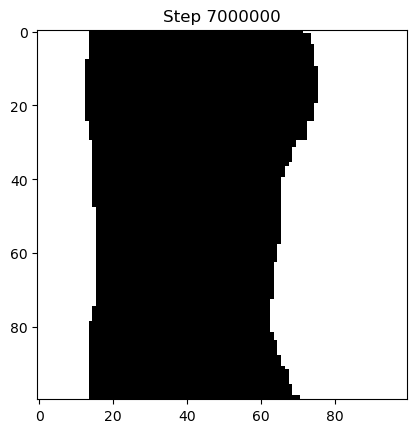

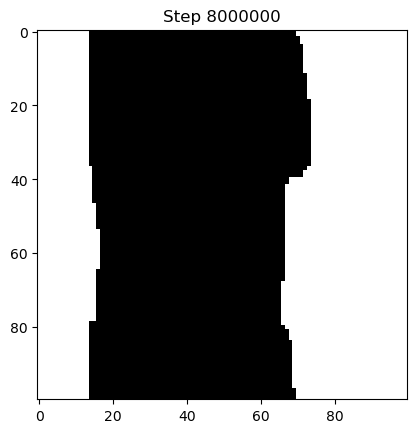

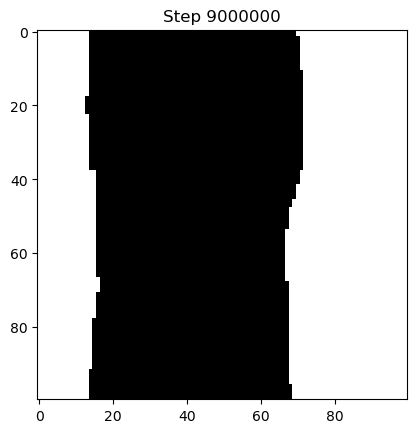

In [9]:
import matplotlib.pyplot as plt

def plot_spin_configuration(S, title="Spin Configuration"):
    plt.imshow(S, cmap='gray', interpolation='nearest')
    plt.title(title)
    plt.show()

# Parameters
N = 100
T = .5 # 
steps = 1000 * N**2

# Initialize spin configuration randomly
S = np.random.choice([-1, 1], size=(N, N))

# Run the simulation and plot at different times
for step in range(steps):
    metropolis(S, T)
    if step % (steps // 10) == 0:
        plot_spin_configuration(S, f"Step {step}")


## e
**After initialisation let the system evolve another $1000 N^2$ time
steps, and store at each 100th time step the energy and the magnetisation. Do this for temperatures between 0.1 and 5.0 and plot the average absolute magnetisation and energy as a function of temperature.**

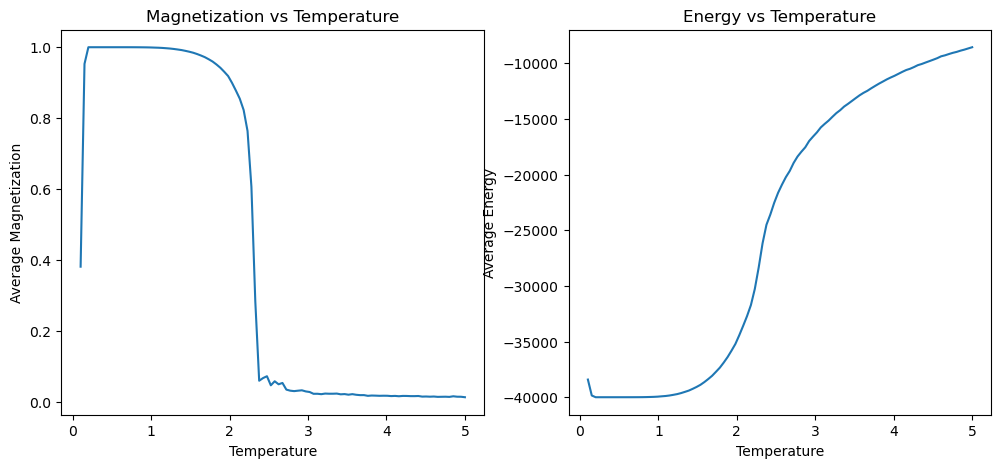

In [10]:
temperatures = np.linspace(0.1, 5.0, 100)
magnetization = []
energy = []

@njit
def calculate_magnetization(S):
    return np.abs(np.sum(S)) / S.size

S = np.random.choice([-1, 1], size=(N, N))

for T in temperatures:
    steps = 1000 * N**2
    mag = []
    en = []
    
    for step in range(steps):
        metropolis(S, T)
        if step % (N**2) == 0:
            mag += [calculate_magnetization(S)]
            en += [calculate_hamiltonian(S)]
    magnetization += [np.mean(mag)]    
    energy += [np.mean(en)]

# Plotting the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(temperatures, magnetization)
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('Magnetization vs Temperature')

plt.subplot(1, 2, 2)
plt.plot(temperatures, energy)
plt.xlabel('Temperature')
plt.ylabel('Average Energy')
plt.title('Energy vs Temperature')

plt.show()


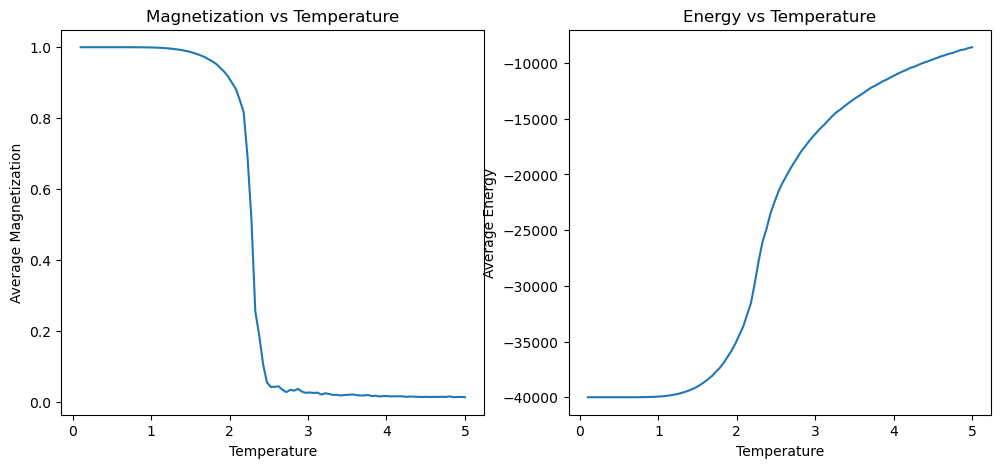

In [11]:
temperatures = np.linspace(5.0, 0.1, 100)
magnetization = []
energy = []

for T in temperatures:
    steps = 1000 * N**2
    mag = []
    en = []
    
    for step in range(steps):
        metropolis(S, T)
        if step % (N**2) == 0:
            mag += [calculate_magnetization(S)]
            en += [calculate_hamiltonian(S)]
    magnetization += [np.mean(mag)]    
    energy += [np.mean(en)]

# Plotting the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(temperatures, magnetization)
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('Magnetization vs Temperature')

plt.subplot(1, 2, 2)
plt.plot(temperatures, energy)
plt.xlabel('Temperature')
plt.ylabel('Average Energy')
plt.title('Energy vs Temperature')

plt.show()


## f
**Determine $T_c$ as best you can. What ways could you improve your estimate?**